In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)

In [58]:
df = pd.read_csv("PrimerFinal.csv", index_col="Unnamed: 0")

In [4]:
df.head()

,registro,ent_at,sit_trab,sexo,base_coti,colectivo,N_RED,i_auto,sist_es,i_trade,cese,c2,c4,c5,c10,c12,ncaso,pos,tipo,regimen,es_atipico,es_recaida,hay_at_previo,duracion,dur_previo,dur_std,v_std,med_clave,cie9_cod,d_sem_baja,mes_baja,es_trafico,es_pl_empleado,es_pl_activo,es_pago_dir,es_susp_ext,es_derecho_cobro,es_alta_prev_insp,es_recaida_ip_denegada,mpq,edad,naltas,provincia,next_fest,past_fest,resultado,es_atrium,prop_atrium,resp_atrium,motivo_pd,nrehab,nbio,dist_ult_baja,avg_altas,alta_oficio,nrecaidas,ncasos,diff_ant_caso,diff_ant_med_adm,mean_ant_med_adm,prev_rechazado
0,0,0,3,1,2000.69,200069,NaN,1,0,0,0,0,0,0,0,0,1300298995,1,1,0,0,0,0,6.0,0.0,15.0,9.0,469.0,44,3,0,0,0,0,1,0,0,0,0,0,39.92,1.0,8,107.0,-1.0,0,0,0,0,0,0.0,0,10000.0,579.0,0,1.0,1.0,10000.0,10000.0,10000.0,0
1,0,0,0,0,2077.80,207780,8327.0,0,0,0,0,0,0,0,0,0,1300299019,1,0,0,0,0,0,153.0,0.0,30.0,-123.0,856.0,124,3,0,0,0,0,0,0,0,0,0,0,65.08,1.0,8,107.0,-1.0,3,0,0,0,0,16.0,0,10000.0,2038.0,0,1.0,1.0,10000.0,10000.0,10000.0,0
2,0,0,0,0,1500.00,150000,NaN,1,0,0,0,0,0,0,1,0,1300299025,1,0,0,0,0,0,30.0,0.0,15.0,-15.0,222.0,218,2,0,0,0,0,0,0,0,0,0,0,59.86,1.0,17,106.0,-2.0,0,0,0,0,0,0.0,0,10000.0,7044.0,0,1.0,1.0,10000.0,10000.0,10000.0,0
3,0,0,0,0,944.40,94440,NaN,1,0,0,0,0,0,0,0,0,1300299044,1,0,0,0,0,0,3.0,0.0,4.0,1.0,843.0,41,3,0,0,0,0,1,0,1,0,0,0,51.06,1.0,8,107.0,-1.0,0,0,0,0,0,0.0,0,10000.0,2937.0,0,1.0,1.0,10000.0,10000.0,10000.0,0
4,0,0,0,0,944.40,94440,NaN,1,0,0,0,0,0,0,0,0,1300299109,1,0,0,0,0,0,139.0,0.0,60.0,-79.0,45.0,34,3,0,0,0,0,0,0,0,0,0,0,37.23,1.0,6,4.0,-1.0,0,0,0,0,0,0.0,0,10000.0,596.0,0,1.0,1.0,10000.0,10000.0,10000.0,0


In [5]:
df = df.fillna(0)

In [6]:
df["cie9_cod"].value_counts()

0       916
1       222
2       168
3       159
4       122
       ... 
2041      1
2042      1
2043      1
2044      1
2045      1
Name: cie9_cod, Length: 2046, dtype: int64

In [7]:
for i in df:
    print(f'{i}: {type(df[i][0])}')

registro: <class 'numpy.int64'>
ent_at: <class 'numpy.int64'>
sit_trab: <class 'numpy.int64'>
sexo: <class 'numpy.int64'>
base_coti: <class 'numpy.float64'>
colectivo: <class 'numpy.int64'>
N_RED: <class 'numpy.float64'>
i_auto: <class 'numpy.int64'>
sist_es: <class 'numpy.int64'>
i_trade: <class 'numpy.int64'>
cese: <class 'numpy.int64'>
c2: <class 'numpy.int64'>
c4: <class 'numpy.int64'>
c5: <class 'numpy.int64'>
c10: <class 'numpy.int64'>
c12: <class 'numpy.int64'>
ncaso: <class 'numpy.int64'>
pos: <class 'numpy.int64'>
tipo: <class 'numpy.int64'>
regimen: <class 'numpy.int64'>
es_atipico: <class 'numpy.int64'>
es_recaida: <class 'numpy.int64'>
hay_at_previo: <class 'numpy.int64'>
duracion: <class 'numpy.float64'>
dur_previo: <class 'numpy.float64'>
dur_std: <class 'numpy.float64'>
v_std: <class 'numpy.float64'>
med_clave: <class 'numpy.float64'>
cie9_cod: <class 'numpy.int64'>
d_sem_baja: <class 'numpy.int64'>
mes_baja: <class 'numpy.int64'>
es_trafico: <class 'numpy.int64'>
es_pl_

In [8]:
df = df.drop("ncaso", axis=1)

In [9]:
df.resultado.value_counts()

0    9331
1     280
2     258
3      73
4      57
5      19
Name: resultado, dtype: int64

# 1

In [10]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.preprocessing import StandardScaler

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_curve

## Regresion logistica 

### Modelo 1
Solo con escalado 

In [59]:
y = df.resultado.to_numpy()

In [60]:
y

array([0, 3, 0, ..., 0, 0, 0])

In [12]:
x = df.drop("resultado", axis=1).values

In [62]:
for i, val in enumerate(y):
    if val == 0:
        y[i] = -1
    elif val == 2 or val == 4 or val == 5:
        y[i] = 0
    else:
        y[i] = 1
        

In [63]:
pd.Series(y).value_counts()

-1    9331
 1     353
 0     334
dtype: int64

In [14]:
condition = (y == 0) | (y == 1)

In [15]:
Y = y[condition]

In [16]:
X = x[condition,:]

In [17]:
X_sindetective = x[~condition,:]
Y_sindetective = y[~condition]

In [18]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_sindetective = scaler.transform(X_sindetective)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.8,random_state = 1234,shuffle = True)

In [20]:
modelo = LogisticRegression(penalty="none")
modelo.fit(X=X_train, y=Y_train)

/home/vcalzada/Work/proyecto/.proPy/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

In [21]:
modelo.score(X,Y)

0.7001455604075691

In [22]:
y_pred = modelo.predict_proba(X_test)
#THRESHOLD = 0.8
#y_pred = np.where(modelo.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0) 

In [23]:
modelo.coef_

array([[-8.68011126e-02, -4.84932437e-02, -1.47492933e-01,
        -3.70206118e-01, -1.21273672e-02, -1.21273672e-02,
         2.85837495e-02, -8.91337012e-02,  2.50256362e-01,
        -2.15931476e+00, -2.34077929e-01,  3.93574839e-02,
         0.00000000e+00, -1.86520623e-01,  1.82887982e-01,
         6.07924945e-02,  8.98704741e-02,  1.24128377e-01,
         9.02224024e-03, -2.20163022e+00, -2.34064058e-01,
        -1.71830265e-01, -6.76866533e-01,  3.16299657e-01,
         2.74230406e-01,  3.58025135e-02, -6.96698975e-02,
         7.38476610e-02, -1.03997585e-01, -2.17138932e-01,
         0.00000000e+00,  0.00000000e+00,  2.17448787e-02,
         9.60685484e-02,  0.00000000e+00, -1.19585909e-01,
         0.00000000e+00,  0.00000000e+00,  1.51076028e-01,
         1.36589449e-01,  1.15585991e-01,  1.24835529e-01,
         1.66011315e-01,  1.29789533e-01, -4.02398016e-01,
        -1.35983846e-01,  9.83719938e-02,  0.00000000e+00,
        -1.57290465e-02, -2.21303461e+00,  1.84574876e-0

In [25]:
df.drop("resultado", axis=1).keys()

Index(['registro', 'ent_at', 'sit_trab', 'sexo', 'base_coti', 'colectivo',
       'N_RED', 'i_auto', 'sist_es', 'i_trade', 'cese', 'c2', 'c4', 'c5',
       'c10', 'c12', 'pos', 'tipo', 'regimen', 'es_atipico', 'es_recaida',
       'hay_at_previo', 'duracion', 'dur_previo', 'dur_std', 'v_std',
       'med_clave', 'cie9_cod', 'd_sem_baja', 'mes_baja', 'es_trafico',
       'es_pl_empleado', 'es_pl_activo', 'es_pago_dir', 'es_susp_ext',
       'es_derecho_cobro', 'es_alta_prev_insp', 'es_recaida_ip_denegada',
       'mpq', 'edad', 'naltas', 'provincia', 'next_fest', 'past_fest',
       'es_atrium', 'prop_atrium', 'resp_atrium', 'motivo_pd', 'nrehab',
       'nbio', 'dist_ult_baja', 'avg_altas', 'alta_oficio', 'nrecaidas',
       'ncasos', 'diff_ant_caso', 'diff_ant_med_adm', 'mean_ant_med_adm',
       'prev_rechazado'],
      dtype='object')

In [26]:
coefs = pd.DataFrame(modelo.coef_, columns=df.drop("resultado", axis=1).keys())

In [27]:
coefs1 = coefs[np.abs(coefs[:]) > 0.2 ].dropna(axis=1)

In [28]:
coefs1

,sexo,sist_es,i_trade,cese,es_atipico,es_recaida,duracion,dur_previo,dur_std,mes_baja,es_atrium,nbio,diff_ant_caso,diff_ant_med_adm,mean_ant_med_adm
0,-0.370206,0.250256,-2.159315,-0.234078,-2.20163,-0.234064,-0.676867,0.3163,0.27423,-0.217139,-0.402398,-2.213035,11.29341,-5.062956,-6.413299


<AxesSubplot:>

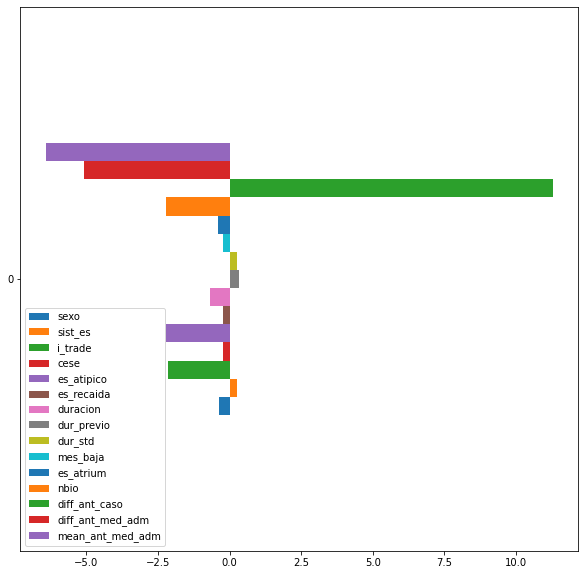

In [29]:
coefs1.plot.barh(figsize =(10,10))

In [32]:
y_sindetective_pred = modelo.predict(X_sindetective)

In [33]:
pd.Series(y_sindetective_pred).value_counts()

1    6815
0    2516
dtype: int64

In [36]:
prob = modelo.predict_proba(X_sindetective)

In [37]:
 val= prob > 0.6

In [38]:
THRESHOLD = 0.9
preds = np.where(modelo.predict_proba(X_sindetective)[:,1] > THRESHOLD, 1, 0) 

In [39]:
pd.Series(preds).value_counts()

0    8874
1     457
dtype: int64

In [ ]:
a
for i in val:
    

### Modelo de random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [42]:
y_pred = clf.predict(X_test)

In [43]:
confusion_matrix(Y_test,y_pred)

array([[44, 29],
       [20, 45]])

In [44]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64        73
           1       0.61      0.69      0.65        65

    accuracy                           0.64       138
   macro avg       0.65      0.65      0.64       138
weighted avg       0.65      0.64      0.64       138



In [45]:
from sklearn.inspection import permutation_importance

#start_time = time.time()
result = permutation_importance(
    clf, X_test, Y_test, n_repeats=100, random_state=42, n_jobs=2
)
#elapsed_time = time.time() - start_time
#print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=df.drop("resultado", axis=1).keys()) 

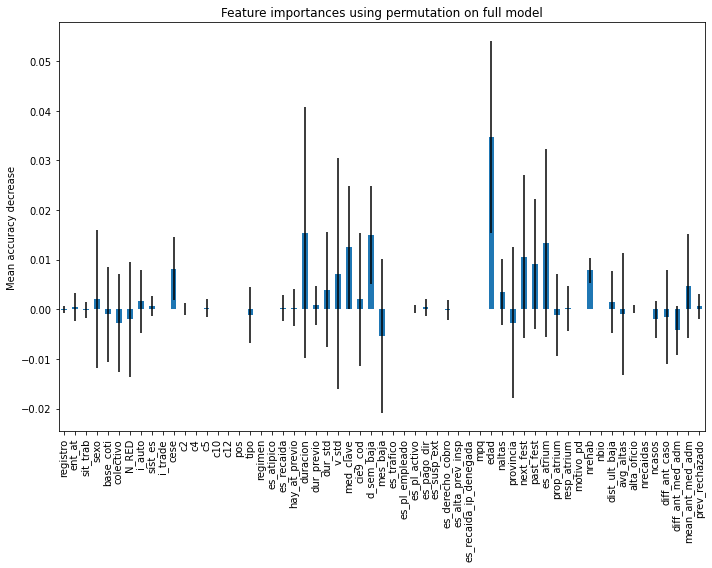

In [46]:
fig, ax = plt.subplots(figsize=(10,8))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show() 

Text(0.5, 0, 'Random Forest Feature Importance')

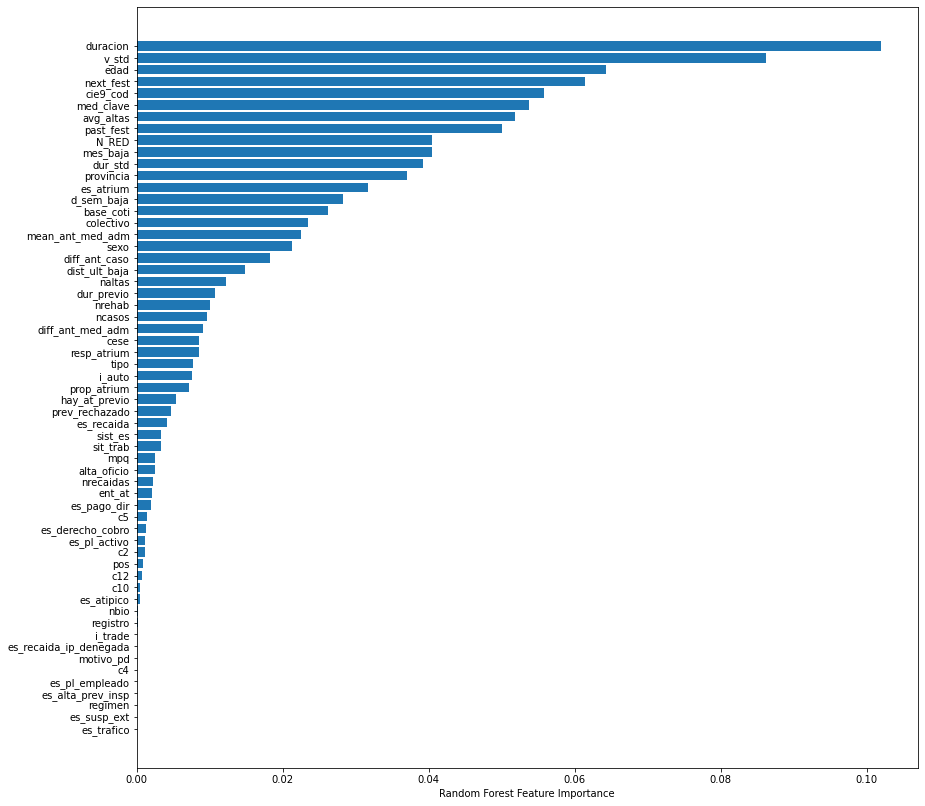

In [48]:
plt.figure(figsize=(14,14))
sorted_idx = clf.feature_importances_.argsort()
plt.barh(df.drop("resultado", axis=1).keys()[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

<BarContainer object of 59 artists>

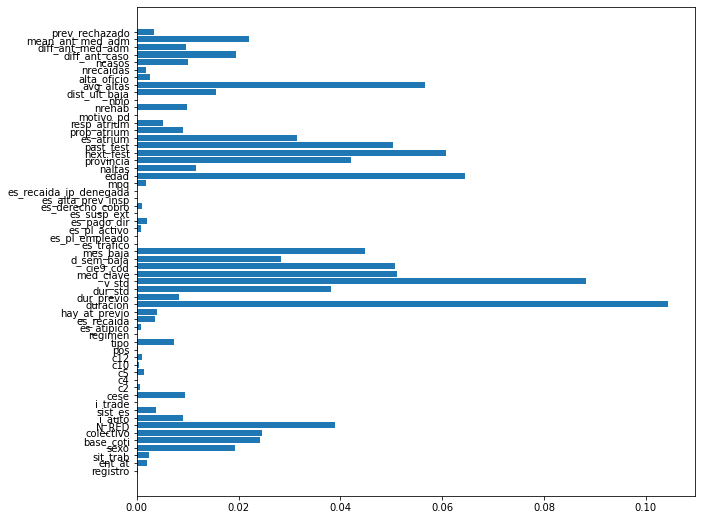

In [126]:
plt.figure(figsize=(10,9))
plt.barh(df.drop("resultado", axis=1).keys(), clf.feature_importances_)

### Modelo 2
Con escalado y PCA

In [ ]:
Y = y[condition]

In [ ]:
X = x[condition,:]

In [ ]:
X_sindetective = x[~condition,:]
Y_sindetective = y[~condition]

In [ ]:
pca = PCA(n_components=50)

In [ ]:
pca.fit(X)
X = pca.transform(X)
X_sindetective = pca.transform(X_sindetective)

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_sindetective = scaler.transform(X_sindetective)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size   = 0.8,random_state = 1234,shuffle      = True)

In [ ]:
modelo2 = LogisticRegression(penalty="none")
modelo2.fit(X=X_train, y=Y_train)

In [ ]:
X.shape

In [ ]:
modelo2.score(X,Y)

In [ ]:
y_pred = modelo2.predict(X_test)

In [ ]:
confusion_matrix(Y_test,y_pred)

In [ ]:
print(classification_report(Y_test,y_pred))

In [ ]:
y_sindetective_pred = modelo2.predict(X_sindetective)

In [ ]:
pd.Series(y_sindetective_pred).value_counts()